You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [94]:
# Start your code here!
import pandas as pd

### 1. EDA

In [95]:
men_df = pd.read_csv('men_results.csv')
women_df = pd.read_csv('women_results.csv')

In [96]:
print(men_df.head())
print(men_df.info())

   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dty

In [97]:
print(women_df.head())
print(women_df.info())

   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3           3  1969-11-02     Italy    Denmark           3           1   
4           4  1975-08-25  Thailand  Australia           3           2   

         tournament  
0              Euro  
1              Euro  
2              Euro  
3              Euro  
4  AFC Championship  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int6

In [98]:
# Remove the unnamed columns
men_df = men_df.iloc[:,1:]
women_df = women_df.iloc[:,1:]

In [99]:
4884 + 44353

49237

In [100]:
# Add new col "category" to identify men or women matches
men_df['category'] = "men"
women_df['category'] = "women"

# Verify the df
print(men_df.head())
print(women_df.head())

         date home_team away_team  home_score  away_score tournament category
0  1872-11-30  Scotland   England           0           0   Friendly      men
1  1873-03-08   England  Scotland           4           2   Friendly      men
2  1874-03-07  Scotland   England           2           1   Friendly      men
3  1875-03-06   England  Scotland           2           2   Friendly      men
4  1876-03-04  Scotland   England           3           0   Friendly      men
         date home_team  away_team  home_score  away_score        tournament  \
0  1969-11-01     Italy     France           1           0              Euro   
1  1969-11-01   Denmark    England           4           3              Euro   
2  1969-11-02   England     France           2           0              Euro   
3  1969-11-02     Italy    Denmark           3           1              Euro   
4  1975-08-25  Thailand  Australia           3           2  AFC Championship   

  category  
0    women  
1    women  
2    women  

In [101]:
# Add new col "total_score" to combine home_score and away_score
men_df['total_score'] = men_df['home_score'] + men_df['away_score']
women_df['total_score'] = women_df['home_score'] + women_df['away_score']

# Verify the df
print(men_df.head())
print(women_df.head())

         date home_team away_team  home_score  away_score tournament category  \
0  1872-11-30  Scotland   England           0           0   Friendly      men   
1  1873-03-08   England  Scotland           4           2   Friendly      men   
2  1874-03-07  Scotland   England           2           1   Friendly      men   
3  1875-03-06   England  Scotland           2           2   Friendly      men   
4  1876-03-04  Scotland   England           3           0   Friendly      men   

   total_score  
0            0  
1            6  
2            3  
3            4  
4            3  
         date home_team  away_team  home_score  away_score        tournament  \
0  1969-11-01     Italy     France           1           0              Euro   
1  1969-11-01   Denmark    England           4           3              Euro   
2  1969-11-02   England     France           2           0              Euro   
3  1969-11-02     Italy    Denmark           3           1              Euro   
4  1975-08-

In [102]:
# Merge the two DataFrames by stacking rows
combined_df = pd.concat([men_df, women_df], ignore_index=True)

# Verify the result
print(combined_df.shape)

(49237, 8)


In [103]:
categorical_columns = ['home_team', 'away_team', 'tournament']

for col in categorical_columns:
    print(combined_df[col].value_counts())
    print()

home_team
United States                715
Germany                      692
Sweden                       677
Brazil                       672
England                      633
                            ... 
Romani people                  1
Kabylia                        1
Saint Pierre and Miquelon      1
Madrid                         1
Sark                           1
Name: count, Length: 319, dtype: int64

away_team
Sweden           692
England          625
Germany          582
Uruguay          572
Norway           567
                ... 
India N            1
Asturias           1
Manchukuo          1
Surrey             1
Central Spain      1
Name: count, Length: 312, dtype: int64

tournament
Friendly                                17630
FIFA World Cup qualification             8050
UEFA Euro qualification                  4030
African Cup of Nations qualification     1990
FIFA World Cup                           1248
                                        ...  
FIFA 75th Anniversa

### 2. Filter the data

In [104]:
# Subset only FIFA World Cup matches
fifa_matches = combined_df[combined_df['tournament'] == 'FIFA World Cup']

In [105]:
# Verify the result
print(fifa_matches.info())
print(fifa_matches.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 1311 to 48822
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1248 non-null   object
 1   home_team    1248 non-null   object
 2   away_team    1248 non-null   object
 3   home_score   1248 non-null   int64 
 4   away_score   1248 non-null   int64 
 5   tournament   1248 non-null   object
 6   category     1248 non-null   object
 7   total_score  1248 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 87.8+ KB
None
            date  home_team      away_team  home_score  away_score  \
1311  1930-07-13    Belgium  United States           0           3   
1312  1930-07-13     France         Mexico           4           1   
1313  1930-07-14     Brazil     Yugoslavia           1           2   
1314  1930-07-14       Peru        Romania           1           3   
1315  1930-07-15  Argentina         France           1           0   

        

In [106]:
# Filter for matches after 2002-01-01
fifa_matches = fifa_matches[fifa_matches['date'] >= '2002-01-01']

In [107]:
# Verify the result
print(fifa_matches.info())
print(fifa_matches.head())

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 25164 to 48822
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         584 non-null    object
 1   home_team    584 non-null    object
 2   away_team    584 non-null    object
 3   home_score   584 non-null    int64 
 4   away_score   584 non-null    int64 
 5   tournament   584 non-null    object
 6   category     584 non-null    object
 7   total_score  584 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 41.1+ KB
None
             date            home_team     away_team  home_score  away_score  \
25164  2002-05-31               France       Senegal           0           1   
25165  2002-06-01              Germany  Saudi Arabia           8           0   
25166  2002-06-01  Republic of Ireland      Cameroon           1           1   
25167  2002-06-01              Uruguay       Denmark           1           2   
25168  2002-06-02            

### 3. Choose the correct hypothesis test

Use EDA to determine the appropriate hypothesis test for this dataset and scenario.

Determining the type of hypothesis test
- Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
- An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.
- To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.

In [108]:
# Separate men and women goals from filtered df
men_goals = fifa_matches[fifa_matches['category'] == 'men']['total_score']
women_goals = fifa_matches[fifa_matches['category'] == 'women']['total_score']

# Verify
print(men_goals.info())
print(women_goals.info())

<class 'pandas.core.series.Series'>
Index: 384 entries, 25164 to 44352
Series name: total_score
Non-Null Count  Dtype
--------------  -----
384 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB
None
<class 'pandas.core.series.Series'>
Index: 200 entries, 45953 to 48822
Series name: total_score
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB
None


In [109]:
# Check the sample size in each group
print(len(men_goals), len(women_goals))

384 200


#### Plot histogram to check goals distribution


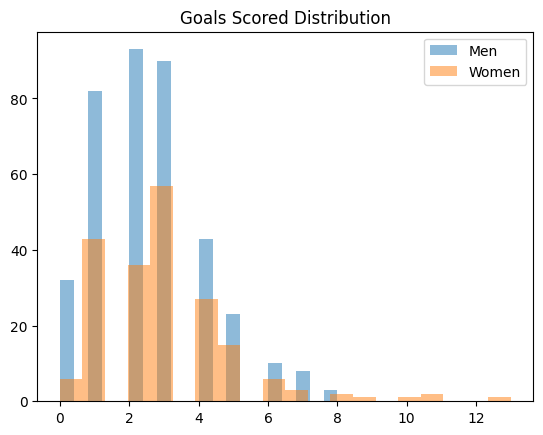

In [110]:
# Check the normality of each group distribution
import matplotlib.pyplot as plt

plt.hist(men_goals, bins=20, alpha=0.5, label='Men')
plt.hist(women_goals, bins=20, alpha=0.5, label='Women')
plt.legend()
plt.title('Goals Scored Distribution')
plt.show()

#### Kolmogorov–Smirnov Test

In [111]:
import numpy as np
from scipy import stats
from scipy.stats import kstest

# Parameters
rvs_men = men_goals # sample to test
rvs_women = women_goals # sample to test
cdf = 'norm' # test against a normal distribution
# args(mean,std) to adjust normal distribution to match sample's parameters
mean_men = np.mean(rvs_men)
std_men = np.std(rvs_men)
mean_women = np.mean(rvs_women)
std_women = np.mean(rvs_women)

# Run the Kolmogorov–Smirnov test for both groups
stat_men, p_men = kstest(rvs_men, 'norm', args=(mean_men,std_men))
print("Kolmogorov-Smirnov Test for Men:")
print(stat_men, p_men)
stat_women, p_women = kstest(rvs_women, 'norm', args=(mean_women,std_women))
print(f"Kolmogorov-Smirnov Test for Women:")
print(stat_women, p_women)

Kolmogorov-Smirnov Test for Men:
0.1611044685335501 3.5612439281978236e-09
Kolmogorov-Smirnov Test for Women:
0.2232077189193953 3.1042127086142515e-09


#### Shapiro–Wilk test

In [112]:
from scipy.stats import shapiro

# Run the Shapiro–Wilk test for both groups
stat_men, p_men = shapiro(men_goals)
print("Kolmogorov-Smirnov Test for Men:")
print(stat_men, p_men)
stat_women, p_women = shapiro(women_goals)
print("Kolmogorov-Smirnov Test for Women:")
print(stat_women, p_women)

Kolmogorov-Smirnov Test for Men:
0.9266493059134338 8.894989197030093e-13
Kolmogorov-Smirnov Test for Women:
0.8491019332746058 3.8908293844628985e-13


#### Observation:

From both Kolmogorov–Smirnov and Shapiro–Wilk tests, we can see the p_value results for both samples. 

And p-value determines whether the data follows a normal distribution where:
- p-value < 0.05: Reject the null hypothesis (the data is not normally distributed).
- p-value ≥ 0.05: Fail to reject the null hypothesis (the data is normally distributed).

Hence, we can conclude that both samples `men_goals` and `women_goals` are not normally distributed given that p_men and p_women are less than 0.05. 

### 4. Perform the hypothesis test

#### Wilcoxon-Mann-Whitney test

In [113]:
# Using pingouin.mwu() 
import pingouin as pg

# Set 10% Significance level
alpha = 0.10  

# Perform the one-sided Mann-Whitney U Test
mwu_result = pg.mwu(x=women_goals, y=men_goals, alternative='greater') # Testing if women > men
print(mwu_result) # print the output dataframe

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451


In [114]:
# Extract the scalar value from the Series: mwu_result['p-val']
p_value = mwu_result['p-val'].values[0]

# Interpret the p-value
if p_value < alpha:
    result = 'reject'
else:
    result = 'fail to reject'

# Store the results
print(f"Result of first test: p-value is {p_value}")
result_dict = {'p_value': p_value, 'result': result}
print(f"Hence, {result_dict['result']} the H0")

Result of first test: p-value is 0.005106609825443641
Hence, reject the H0


In [115]:
# Using scipy.stats.mannwhitneyu()
from scipy.stats import mannwhitneyu

# Set 10% Significance level
alpha = 0.10  

# Perform the one-sided Mann-Whitney U Test
test_stat, p_value = mannwhitneyu(women_goals, men_goals, alternative='greater')
print(test_stat, p_value)

43273.0 0.005106609825443641


In [116]:
# Interpret the p-value
if p_value < alpha:
    result = 'reject'
else:
    result = 'fail to reject'

# Store the results
print(f"Result of second test: p-value is {p_value}")
result_dict = {'p_value': p_value, 'result': result}
print(f"Hence, {result_dict['result']} the H0")

Result of second test: p-value is 0.005106609825443641
Hence, reject the H0


### Interpret the result of the hypothesis test

As instructed, we used these hypotheses:

- $H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.
- $H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

We then interpret the result of the hypothesis tests based on the p-values:

- p-value < 0.10, we have to **reject** the null hypothesis
- p-value ≥ 0.10, we **fail to reject** the null hypothesis

**Conclusion**

Since both results stated to reject the null hypothesis, we can conclude that the goals scored in women's international soccer matches is greater than men's.